# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_04ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,icurl-00001-00002,"['--disable-shared', '--enable-debug', '--enab...",68.0125,4635488
1,1,icurl-00001-00003,"['--disable-shared', '--disable-largefile', '-...",29.6170,4636688
2,2,icurl-00001-00004,"['--disable-shared', '--disable-largefile', '-...",36.7485,2990584
3,3,icurl-00001-00005,"['--disable-shared', '--enable-silent-rules', ...",21.3245,1373432
4,4,icurl-00001-00006,"['--disable-shared', '--disable-largefile', '-...",65.7340,4527616
...,...,...,...,...,...
375,375,icurl-00020-00015,"['--disable-shared', '--disable-largefile', '-...",42.6040,4115888
376,376,icurl-00020-00016,"['--disable-shared', '--disable-largefile', '-...",19.7700,734264
377,377,icurl-00020-00017,"['--disable-shared', '--disable-largefile', '-...",21.7705,855168
378,378,icurl-00020-00018,"['--disable-shared', '--disable-largefile', '-...",19.3740,3779784


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,icurl-00001-00002,"['--disable-shared', '--enable-debug', '--enab...",68.0125,4635488,icurl,00001,00002
1,1,icurl-00001-00003,"['--disable-shared', '--disable-largefile', '-...",29.6170,4636688,icurl,00001,00003
2,2,icurl-00001-00004,"['--disable-shared', '--disable-largefile', '-...",36.7485,2990584,icurl,00001,00004
3,3,icurl-00001-00005,"['--disable-shared', '--enable-silent-rules', ...",21.3245,1373432,icurl,00001,00005
4,4,icurl-00001-00006,"['--disable-shared', '--disable-largefile', '-...",65.7340,4527616,icurl,00001,00006
...,...,...,...,...,...,...,...,...
375,375,icurl-00020-00015,"['--disable-shared', '--disable-largefile', '-...",42.6040,4115888,icurl,00020,00015
376,376,icurl-00020-00016,"['--disable-shared', '--disable-largefile', '-...",19.7700,734264,icurl,00020,00016
377,377,icurl-00020-00017,"['--disable-shared', '--disable-largefile', '-...",21.7705,855168,icurl,00020,00017
378,378,icurl-00020-00018,"['--disable-shared', '--disable-largefile', '-...",19.3740,3779784,icurl,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN  26.5800  24.6925  24.7425  24.6945  24.7480  24.5785   
00002    68.0125      NaN  67.6085  68.2015  67.9495  67.7925  67.7980   
00003    29.6170  30.4630      NaN  29.8035  29.6790  29.7990  29.8665   
00004    36.7485  36.8050  36.8800      NaN  36.7695  36.8740  36.7120   
00005    21.3245  22.4825  21.3470  21.4295      NaN  21.3645  21.2620   
00006    65.7340  66.2065  66.1980  66.0020  65.7100      NaN  65.6770   
00007    27.0750  27.4415  26.9820  27.0640  26.9690  27.1115      NaN   
00008    24.4895  25.3070  24.3885  24.4675  24.4350  24.5070  24.3990   
00009    25.8560  26.9540  25.8695  25.8015  25.7285  25.8940  25.8035   
00010    46.6595  47.4580  46.6680  46.7565  46.5235  46.6600  46.4525   
00011     1.2410   1.2905   1.2345   1.1945   1.1720   1.2300   1.2220   
00012    37.5925  37.7655  37.6175  37.7250  37.6050  37.6860  37.5065   
00013     0.2710   0.2770   0.2735   0.2410   0.2190   0.2675   0.2585   
00014    19.7805  20.2440  19.8245  19.8805  19.8125  19.9020  19.7795   
00015    41.7565  41.9120  41.8200  41.9505  41.6420  41.9880  41.7165   
00016    19.4390  20.6240  19.3360  19.3760  19.3225  19.3370  19.3310   
00017    21.1775  21.6805  21.2060  21.2455  21.3335  21.2755  21.2960   
00018    18.9300  19.9805  18.9590  19.0710  18.9610  18.9940  18.9650   
00019    41.4905  42.4280  41.5850  41.5345  41.4895  41.6510  41.4775   
00020    25.4220  26.0875  25.5080  25.4645  25.4165  25.3810  25.2720   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001  24.7220  24.6255  24.9525   1.0620  24.8115   1.0580  24.9965  25.1215   
00002  67.8410  67.9180  68.2640  35.0050  68.3395  36.0020  69.5525  69.0010   
00003  29.7590  29.6300  29.8040   0.1080  29.8315   0.1080  30.0880  30.2860   
00004  36.7340  36.7915  36.9625  19.5625  37.0750  19.6195  37.2090  37.5695   
00005  21.2935  21.4025  21.3920   0.1165  21.4575   0.1175  21.4450  21.7055   
00006  65.6725  65.8955  65.9440  34.8210  66.1555  34.7770  66.1070  66.8445   
00007  27.1050  27.0850  27.1345   1.0615  27.0340   1.0630  27.2925  27.5595   
00008      NaN  24.4340  24.5070   0.1175  24.4910   0.1140  24.7435  24.7340   
00009  25.8550      NaN  25.8225   0.1180  25.9015   0.1175  26.0945  26.1835   
00010  46.6205  46.6365      NaN  24.5400  46.7825  24.6190  47.9380  47.8540   
00011   1.2510   1.2165   1.2090      NaN   1.2110   1.0075   1.2615   1.2300   
00012  37.6085  37.6310  37.7965  19.9895      NaN  19.9415  37.7160  38.1320   
00013   0.2705   0.2535   0.2315   0.0525   0.2475      NaN   0.2615   0.2805   
00014  19.7825  19.7790  19.9300   0.1080  19.8860   0.1075      NaN  20.1655   
00015  41.8860  42.0005  42.2785  22.0845  42.1505  22.1880  41.9230      NaN   
00016  19.3220  19.3160  19.4690   0.1080  19.4645   0.1065  19.4745  19.6245   
00017  21.2865  21.2355  21.3790   0.1100  21.3900   0.1070  21.5210  21.5565   
00018  19.0055  19.0290  19.1130   0.1065  19.0590   0.1060  19.1385  19.3020   
00019  41.6205  41.6265  41.7650  21.9015  41.7860  21.8215  41.8630  42.0200   
00020  25.6650  25.4715  25.3785   1.0710  25.6905   1.0735  26.2700  25.8025   

                                                    
Br1      00016    00017    00018    00019    00020  
Br2                                                 
00001  24.9420  24.9620  25.2160  25.3210  25.1800  
00002  68.4695  69.6325  69.3055  69.1205  69.7425  
00003  29.8305  30.3400  30.4385  30.5085  30.4270  
00004  37.0290  37.2340  37.2660  37.4965  37.4370  
00005  21.4255  22.0845  21.7140  21.9515  21.8045  
00006  66.4920 

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00013)"
00002,"(Build Time, 00011)"
00003,"(Build Time, 00011)"
00004,"(Build Time, 00011)"
00005,"(Build Time, 00011)"
00006,"(Build Time, 00013)"
00007,"(Build Time, 00011)"
00008,"(Build Time, 00013)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  4687080.0  4467072.0  4687080.0  4687080.0  4467072.0   
00002   4635488.0        NaN  4400456.0  4635488.0  4635488.0  4400456.0   
00003   4636688.0  4636688.0        NaN  4636688.0  4636688.0  4636680.0   
00004   2990584.0  2990584.0  2779192.0        NaN  2990584.0  2779192.0   
00005   1373432.0  1373432.0  1160440.0  1373432.0        NaN  1160440.0   
00006   4527616.0  4527616.0  4527608.0  4527616.0  4527616.0        NaN   
00007   3779768.0  3779768.0  3779760.0  3779768.0  3779768.0  3779760.0   
00008   4899592.0  4899592.0  4899584.0  4899592.0  4899592.0  4899584.0   
00009   3838144.0  3838144.0  3838136.0  3838144.0  3838144.0  3838136.0   
00010   2970256.0  2970256.0  2758864.0  2970256.0  2970256.0  2758864.0   
00011   4687080.0  4635488.0  4636680.0  2990584.0  1373432.0  4527608.0   
00012   3373904.0  3373904.0  3162512.0  3373904.0  3373904.0  3162512.0   
00013   4687080.0  4635488.0  4636680.0  2990584.0  1373432.0  4527608.0   
00014   4429120.0  4429120.0  4209112.0  4429120.0  4429120.0  4209112.0   
00015   4115888.0  4115888.0  4115888.0  4115888.0  4115888.0  4115888.0   
00016    734264.0   734264.0   525368.0   734264.0   734264.0   525368.0   
00017    855168.0   855168.0   646272.0   855168.0   855168.0   646272.0   
00018   3779784.0  3779784.0  3779784.0  3779784.0  3779784.0  3779784.0   
00019   4119800.0  4119800.0  4119800.0  4119800.0  4119800.0  4119800.0   
00020   4077992.0  4077992.0  3857984.0  4077992.0  4077992.0  3857984.0   

                                                                        \
Br1        00007      00008      00009      00010     00011      00012   
Br2                                                                      
00001  4467072.0  4467072.0  4467072.0  4687080.0  569576.0  4687080.0   
00002  4400456.0  4400456.0  4400456.0  4635488.0  569576.0  4635488.0   
00003  4636680.0  4636680.0  4636680.0  4636688.0  569576.0  4636688.0   
00004  2779192.0  2779192.0  2779192.0  2990584.0  569576.0  2990584.0   
00005  1160440.0  1160440.0  1160440.0  1373432.0  569576.0  1373432.0   
00006  4527608.0  4527608.0  4527608.0  4527616.0  569576.0  4527616.0   
00007        NaN  3779760.0  3779760.0  3779768.0  569576.0  3779768.0   
00008  4899584.0        NaN  4899584.0  4899592.0  569576.0  4899592.0   
00009  3838136.0  3838136.0        NaN  3838144.0  569576.0  3838144.0   
00010  2758864.0  2758864.0  2758864.0        NaN  569576.0  2970256.0   
00011  3779760.0  4899584.0  3838136.0  2970256.0       NaN  3373904.0   
00012  3162512.0  3162512.0  3162512.0  3373904.0  569576.0        NaN   
00013  3779760.0  4899584.0  3838136.0  2970256.0  569576.0  3373904.0   
00014  4209112.0  4209112.0  4209112.0  4429120.0  569576.0  4429120.0   
00015  4115888.0  4115888.0  4115888.0  4115888.0  569576.0  4115888.0   
00016   525368.0   525368.0   525368.0   734264.0  569576.0   734264.0   
00017   646272.0   646272.0   646272.0   855168.0  569576.0   855168.0   
00018  3779784.0  3779784.0  3779784.0  3779784.0  569576.0  3779784.0   
00019  4119800.0  4119800.0  4119800.0  4119800.0  569576.0  4119800.0   
00020  3857984.0  3857984.0  3857984.0  4077992.0  569576.0  4077992.0   

                                                                        \
Br1       00013      00014      00015      00016      00017      00018   
Br2                                                                      
00001  611888.0  4687080.0  4467072.0  4687080.0  4687080.0  4467072.0   
00002  611888.0  4635488.0  4400456.0  4635488.0  4635488.0  4400456.0   
00003  611888.0  4636688.0  4636680.0  4636688.0  4636688.0  4636680.0   
00004  611888.0  2990584.0  2779192.0  2990584.0  2990584.0  2779192.0   
00005  611888.0  1373432.0  1160440.

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,26.5800,22.474026,1.0580
00002,69.7425,65.029263,35.0050
00003,30.5085,26.862474,0.1080
00004,37.5695,35.198684,19.5625
00005,22.4825,19.322105,0.1165
00006,67.6495,62.961921,34.7770
00007,27.5985,24.487553,1.0615
00008,25.3070,22.081237,0.1140


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00002,69.7425,65.029263,35.0050
00006,67.6495,62.961921,34.7770
00010,47.9380,44.727632,24.5400
00015,42.8835,39.990500,22.0845
00019,42.4280,39.685711,21.8215
00012,42.5720,36.173842,19.9415
00004,37.5695,35.198684,19.5625
00020,26.2700,23.032526,1.0710


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

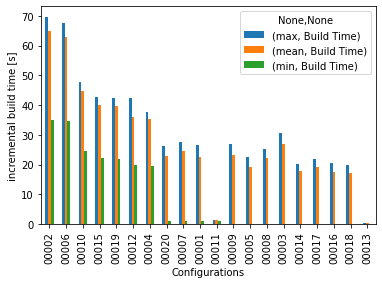

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

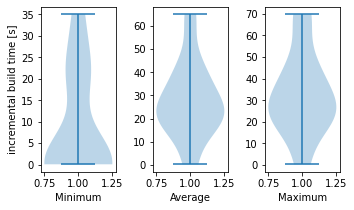

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,26.5800,24.6925,24.7425,24.6945,24.7480,24.5785,24.7220,24.6255,24.9525,1.0620,24.8115,1.0580,24.9965,25.1215,24.9420,24.9620,25.2160,25.3210,25.1800
00002,68.0125,NaN,67.6085,68.2015,67.9495,67.7925,67.7980,67.8410,67.9180,68.2640,35.0050,68.3395,36.0020,69.5525,69.0010,68.4695,69.6325,69.3055,69.1205,69.7425
00003,29.6170,30.4630,NaN,29.8035,29.6790,29.7990,29.8665,29.7590,29.6300,29.8040,0.1080,29.8315,0.1080,30.0880,30.2860,29.8305,30.3400,30.4385,30.5085,30.4270
00004,36.7485,36.8050,36.8800,NaN,36.7695,36.8740,36.7120,36.7340,36.7915,36.9625,19.5625,37.0750,19.6195,37.2090,37.5695,37.0290,37.2340,37.2660,37.4965,37.4370
00005,21.3245,22.4825,21.3470,21.4295,NaN,21.3645,21.2620,21.2935,21.4025,21.3920,0.1165,21.4575,0.1175,21.4450,21.7055,21.4255,22.0845,21.7140,21.9515,21.8045
00006,65.7340,66.2065,66.1980,66.0020,65.7100,NaN,65.6770,65.6725,65.8955,65.9440,34.8210,66.1555,34.7770,66.1070,66.8445,66.4920,66.1370,67.6495,67.2030,67.0505
00007,27.0750,27.4415,26.9820,27.0640,26.9690,27.1115,NaN,27.1050,27.0850,27.1345,1.0615,27.0340,1.0630,27.2925,27.5595,27.2100,27.5110,27.5055,27.4605,27.5985
00008,24.4895,25.3070,24.3885,24.4675,24.4350,24.5070,24.3990,NaN,24.4340,24.5070,0.1175,24.4910,0.1140,24.7435,24.7340,24.7045,24.8520,24.9370,25.0265,24.8890
00009,25.8560,26.9540,25.8695,25.8015,25.7285,25.8940,25.8035,25.8550,NaN,25.8225,0.1180,25.9015,0.1175,26.0945,26.1835,26.0280,26.3845,26.3045,26.4660,26.1520
